# Deep Learning In Keras
## A Crash Course

[Ben Wendt](http://benwendt.ca/) - [TWG](https://twg.io/)

# What is Machine Learning

Any algorithm that can continually learn to get better at its task is a learning algorithm. Any time you introspect on data to provide feedback for an algorithm to improve, that's machine learning.

## examples:

- Linear Regression
- Logistic Regression
- Linear Discriminant Analysis
- Classification and Regression Trees
- Naive Bayes
- K-Nearest Neighbors
- Learning Vector Quantization
- Support Vector Machines

# What are neural nets?

![neurons](neurons.jpg)
![neuron-net](neuron-net.jpg)
![neural net](nn.png)

A neural network is a machine learning technique that uses a network structure inspired by the brain. A directed graph composed of neuron simulations called "perceptrons" can take an arbitrary input and approximate an arbitrary (desired) output. E.g. map images of handwritten digits to the correct digit.



# Universal Approximation

This universal approximation is the special sauce that makes neural nets so useful. We can take any function and a suitable neural net will be able to approximate it. Examples of approximable functions are:

- voice recognition
- language translation
- adding captions to images
- finishing a sentence
- super-resolution

The example I'll focus on today is image classification.

# Optimization

Universal approximation makes neural nets capable of being useful, but finding these approximations takes another technique.

Generally we will start with a random solution to a problem (which will of course be pretty bad), and work towards a better solution using optimization, which is taking a series of small steps towards a better solution.

Networks are optimized using a process called gradient descent. This works by comparing the generated output of a network during training and comparing it to the desired output. By iteratively adjusting how the network adds and multiplies its inputs together, we can work toward a more accurate approximation.

# What is Deep Learning

Neural nets are divided into layers of neurons that all behave similarly. The early basic neural nets all had one layer. While these are capable of learning to approximate any function, using network architectures with more than one layer provides better results faster.

A neural network with layers between the input and output (known as hidden layers) are called "deep neural networks".

# SHOES

Inspired by a problem I worked on at a previous job, let's look at how we could use a neural network to automatically detect the brand of a shoe, given only the image of a shoe. This is a task a human could perform well at, but let's teach the computer to do it for us.

In [1]:
DATA_DIR = './data/'

In [2]:
import os, random

from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
classes = ['birkenstock', 'doc-martens', 'hunter']
num_classes = len(classes)

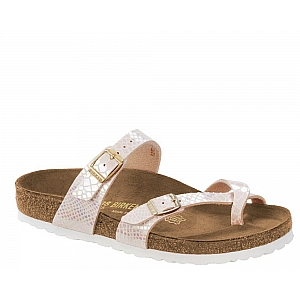

./data/train/birkenstock/W300-H300-42894_1005047-1.jpg


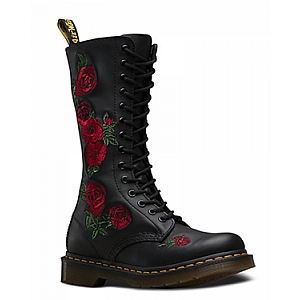

./data/train/doc-martens/W300-H300-82467_R12761001-1.jpg


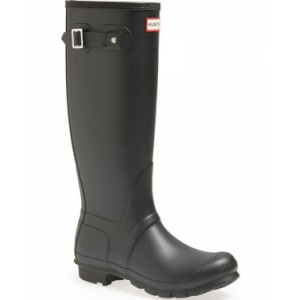

./data/train/hunter/W300-H300-85284_WFT1000RMA-BLK-1.jpg


In [4]:
# image preview               
for sub in classes:
    base = DATA_DIR + 'train/' + sub
    file_name = base + '/' + random.choice(os.listdir(base))
    display(Image(filename = file_name))
    print(file_name)


# the problem

Your e-commerce store has some products which are missing manufacturer data. The solution: classifying a shoe by image.

# other approaches

* make the prediction based on structured data, i.e. look for keywords in product descriptions, maybe the brand is in the product url, etc.


# let's try with a deep neural net

# features of neural networks

* universal approximator
* universal optimizer
* fast enough to be useful

# features of deep neural networks

Custom architectures make training feasible. Architectures can be set up to do:

* feature detection
* have short or long term memory
* detect relationships in data


# the layer concept

![layers](neural_net2.jpeg)

# dense layers

A dense layers connects all inputs to all outputs. This is useful for categorizing data, but it cannot do feature detection.

## XOR example

Exclusive Or is a function that characterized by:

IN | OUT
---|----
(0,0)|0
(1,0)|1
(0,1)|1
(0,0)|0

Let's see what happens when a neural network learns to fit to this function.

In [2]:
from IPython.display import IFrame
IFrame('graph.html', width=800, height=600)

# convolutional layers

A moving window that can do feature detection

![convolution gif](numerical_padding_strides.gif)

[source: deeplearning.net](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html)

In [6]:
from IPython.display import IFrame
IFrame('convo.html', width=1000, height=600)

Note that this is only showing a greyscale image for simplicity. Convolutions will generally be set up to work on all 3 or 4 channels of your input image.

When a convolution neural net is initialized, there will generally be many convolutions, and the convolutions are all initialized randomly. The optimizer then changes these to fit your data and you end up with convolutions that detect edges, curves, corners, and so on.

With that library of shape building blocks, later convolutional layers can detect more interesting features. E.g. A curve on the left, top, bottom and right, with a dark circle in the middle might make an eye.

![eye make](eyemake.png)

# higher order convolutions

![](conv-viz.jpg)
[source](https://arxiv.org/abs/1311.2901)

# Max Pooling

This technique reduces the resolution of an input and reduces it to the maximum value found in a partition.

![](MaxpoolSample2.png)

[source - computersciencewiki.org](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling)

# learning rate

See [google's example of how to set a learning rate](https://developers.google.com/machine-learning/crash-course/fitter/graph)

# data sets

* training set: generally about 80% of your examples are used to train the model
* validation set: generally 10% are used to validate that the model is working correctly during training.
* test set: the remaining 10% is for confirming that the trained model is working correctly.

All three data sets should be representative of all the features of your data. 


# data partitions

![](train-test.png)

![](train-valid-test.png)

[source](https://developers.google.com/machine-learning/crash-course/validation/another-partition)

# be careful

A bad train-test-validation partition will break your model. For example, taking the first third of the California housing prices data set just breaks the data by longitude, which make the test and training data not representative of one another.

![](cali.png)

# Loss Functions

Fitting your model to data requires knowing how far off the model is from what it is trying to fit. The loss function answers the question "how much error is my model producing?" In general, you will want a low loss, but it is also generally impossible to get it all the way to zero.

There are a variety of loss functions depending on what you are trying to model, but I'll just talk about one that is generally used for categorization in the lecture: [categorical cross entropy](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/).

This loss function takes a variety of options and highlights the one with the highest value.

# Fitting

* A model is *underfitting* if it has lower accuracy than your goal. This can be addressed by using a larger or better model.
* A model is *overfitting* if it performs noticably better on the training set than it does on the test set. This can be addressed by adding data to the training set.

# Keras Demo

# Where to go from here

- [fast ai](https://fast.ai/)
- [google machine learning course](https://developers.google.com/machine-learning/crash-course/ml-intro)